In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('rare_species.csv')

In [3]:
df.head()

,rarespecies_id,eol_content_id,eol_page_id,kingdom,phylum,class,order,family,genus,species,sciName,common,file_name
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,Animalia,Mollusca,Bivalvia,Unionida,Unionidae,Cyclonaias,tuberculata,Cyclonaias tuberculata,purple wartyback,dataset/Animalia-Mollusca-Bivalvia-Unionida-Un...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,Animalia,Chordata,Reptilia,Testudines,Geoemydidae,Pangshura,sylhetensis,Pangshura sylhetensis,Assam Roofed Turtle,dataset/Animalia-Chordata-Reptilia-Testudines-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,Animalia,Chordata,Amphibia,Caudata,Cryptobranchidae,Andrias,japonicus,Andrias japonicus,Japanese Giant Salamander,dataset/Animalia-Chordata-Amphibia-Caudata-Cry...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,Animalia,Chordata,Aves,Passeriformes,Turdidae,Myadestes,obscurus,Myadestes obscurus,'Oma'o,dataset/Animalia-Chordata-Aves-Passeriformes-T...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,Animalia,Chordata,Mammalia,Primates,Indriidae,Propithecus,deckenii,Propithecus deckenii,Van der Decken's Sifaka,dataset/Animalia-Chordata-Mammalia-Primates-In...


In [4]:
endangered_mapping = {'Abronia deppii': 1,
 'Abronia graminea': 0,
 'Acanthochelys macrocephala': 0,
 'Aceros nipalensis': 1,
 'Acipenser sturio': 1,
 'Acropora acuminata': 0,
 'Acropora cervicornis': 1,
 'Acropora digitifera': 0,
 'Acropora echinata': 1,
 'Acropora florida': 1,
 'Acropora millepora': 0,
 'Addax nasomaculatus': 1,
 'Adetomyrma venatrix': 0,
 'Agalychnis lemur': 1,
 'Agaricia humilis': 0,
 'Agaricia lamarcki': 0,
 'Ailuropoda melanoleuca': 0,
 'Albula vulpes': 0,
 'Allochrocebus lhoesti': 0,
 'Alopias pelagicus': 1,
 'Alopias vulpinus': 0,
 'Alouatta belzebul': 1,
 'Alouatta caraya': 0,
 'Amazona collaria': 1,
 'Amazona vinacea': 1,
 'Ambystoma barbouri': 0,
 'Ambystoma mexicanum': 1,
 'Anaxyrus californicus': 0,
 'Andigena laminirostris': 0,
 'Andrias davidianus': 1,
 'Andrias japonicus': 1,
 'Aneuretus simoni': 1,
 'Anolis baracoae': 0,
 'Anolis barbouri': 0,
 'Anolis bitectus': 0,
 'Anolis bonairensis': 0,
 'Anolis cooki': 1,
 'Anolis koopmani': 0,
 'Anolis luciae': 0,
 'Anolis macrolepis': 0,
 'Anolis marcanoi': 0,
 'Anolis monteverde': 0,
 'Anorrhinus austeni': 0,
 'Anser canagicus': 0,
 'Anthracoceros coronatus': 0,
 'Anthus nilghiriensis': 1,
 'Antrostomus vociferus': 0,
 'Aonyx capensis': 0,
 'Aotus griseimembra': 0,
 'Aotus lemurinus': 0,
 'Arctocephalus galapagoensis': 1,
 'Astrochelys radiata': 1,
 'Ateles hybridus': 1,
 'Ateles paniscus': 1,
 'Atelopus certus': 1,
 'Atelopus flavescens': 0,
 'Atelopus glyphus': 1,
 'Atelopus zeteki': 1,
 'Athene blewitti': 1,
 'Balaeniceps rex': 0,
 'Balaenoptera bonaerensis': 0,
 'Balistes capriscus': 0,
 'Balistes vetula': 0,
 'Bathytoshia centroura': 0,
 'Batrachoseps wrighti': 0,
 'Berenicornis comatus': 1,
 'Bettongia penicillata': 1,
 'Bitis nasicornis': 0,
 'Bolitoglossa hartwegi': 0,
 'Bolitoglossa helmrichi': 0,
 'Bombus crotchii': 1,
 'Bombus dahlbomii': 1,
 'Bombus mexicanus': 0,
 'Bombus morrisoni': 0,
 'Bombus variabilis': 1,
 'Bombycilla japonica': 0,
 'Botaurus poiciloptilus': 1,
 'Brachypelma auratum': 0,
 'Brachypteracias leptosomus': 0,
 'Brachyteles hypoxanthus': 1,
 'Branta ruficollis': 1,
 'Buceros bicornis': 0,
 'Cacatua moluccensis': 1,
 'Callithrix aurita': 1,
 'Callorhinchus callorynchus': 0,
 'Callorhinus ursinus': 0,
 'Calumma ambreense': 0,
 'Campylopterus ensipennis': 0,
 'Campylopterus villaviscensio': 0,
 'Capra sibirica': 0,
 'Capricornis sumatraensis': 0,
 'Carabus intricatus': 0,
 'Carcharhinus acronotus': 0,
 'Carcharhinus albimarginatus': 0,
 'Carcharhinus amblyrhynchos': 0,
 'Carcharhinus falciformis': 0,
 'Carcharhinus melanopterus': 0,
 'Carcharhinus obscurus': 0,
 'Carettochelys insculpta': 1,
 'Catharus bicknelli': 1,
 'Cebuella pygmaea': 0,
 'Cebus unicolor': 0,
 'Centrochelys sulcata': 0,
 'Ceratogomphus triceraticus': 0,
 'Ceratophora tennentii': 1,
 'Cercopithecus mona': 0,
 'Certhidea olivacea': 0,
 'Ceruchus chrysomelinus': 0,
 'Cetorhinus maximus': 0,
 'Chaetodon rainfordi': 0,
 'Chaetodon trifascialis': 0,
 'Chiloscyllium plagiosum': 0,
 'Chioglossa lusitanica': 0,
 'Chlidonias albostriatus': 1,
 'Choerodon schoenleinii': 0,
 'Choeronycteris mexicana': 0,
 'Chrysoblephus laticeps': 0,
 'Clonophis kirtlandii': 1,
 'Conolophus pallidus': 1,
 'Conus mercator': 0,
 'Copsychus sechellarum': 1,
 'Crocodylus palustris': 0,
 'Crocodylus rhombifer': 1,
 'Ctenomys pearsoni': 0,
 'Ctenosaura bakeri': 1,
 'Cyclonaias tuberculata': 0,
 'Cyclura lewisi': 1,
 'Cynarina lacrymalis': 0,
 'Cynomys parvidens': 1,
 'Cyprinodon macularius': 1,
 'Dalatias licha': 0,
 'Dasyatis pastinaca': 0,
 'Dasyurus maculatus': 0,
 'Daubentonia madagascariensis': 1,
 'Desmognathus aeneus': 0,
 'Desmognathus imitator': 0,
 'Dichocoenia stokesii': 0,
 'Diploastrea heliopora': 0,
 'Dolomedes plantarius': 1,
 'Dorymyrmex insanus': 0,
 'Drepanis coccinea': 1,
 'Egretta vinaceigula': 1,
 'Elaphrus viridis': 0,
 'Elaphurus davidianus': 1,
 'Eliomys quercinus': 0,
 'Epinephelus morio': 0,
 'Epinephelus polyphekadion': 1,
 'Equus zebra': 0,
 'Esacus magnirostris': 0,
 'Esacus recurvirostris': 0,
 'Etheostoma lepidum': 0,
 'Eubalaena glacialis': 1,
 'Eudyptes chrysolophus': 0,
 'Eudyptes moseleyi': 1,
 'Eulemur fulvus': 0,
 'Eulemur rufus': 1,
 'Eupodotis caerulescens': 0,
 'Eurycea rathbuni': 1,
 'Euryceros prevostii': 0,
 'Falco deiroleucus': 0,
 'Falco jugger': 0,
 'Fimbriaphyllia ancora': 0,
 'Formica lugubris': 0,
 'Fulica alai': 1,
 'Fungia fungites': 0,
 'Galaxea astreata': 0,
 'Galaxea fascicularis': 0,
 'Galeocerdo cuvier': 0,
 'Gallinago media': 0,
 'Gavialis gangeticus': 1,
 'Glareola nordmanni': 1,
 'Glyptemys muhlenbergii': 1,
 'Graptemys oculifera': 1,
 'Gubernatrix cristata': 1,
 'Gymnura marmorata': 0,
 'Gyps coprotheres': 1,
 'Halcyon pileata': 0,
 'Haliaeetus vociferoides': 1,
 'Haliotis roei': 0,
 'Harpagoxenus canadensis': 0,
 'Harpia harpyja': 1,
 'Heliopora coerulea': 1,
 'Helioseris cucullata': 0,
 'Hemigomphus theischingeri': 0,
 'Hemitragus jemlahicus': 0,
 'Hexanchus griseus': 0,
 'Himantopus novaezelandiae': 1,
 'Hippocampus reidi': 0,
 'Hippocampus spinosissimus': 0,
 'Hippoglossoides platessoides': 0,
 'Hyaena hyaena': 0,
 'Hydnophora exesa': 0,
 'Hydromantes brunus': 1,
 'Hydromedusa maximiliani': 1,
 'Hylobates agilis': 1,
 'Hylobates funereus': 1,
 'Hymenolaimus malacorhynchos': 1,
 'Hynobius quelpaertensis': 1,
 'Iberolacerta bonnali': 1,
 'Iguana delicatissima': 1,
 'Kinyongia multituberculata': 0,
 'Lacerta schreiberi': 0,
 'Lachnolaimus maximus': 0,
 'Lamna nasus': 1,
 'Larosterna inca': 0,
 'Lasiorhinus latifrons': 0,
 'Lathamus discolor': 1,
 'Latimeria chalumnae': 1,
 'Leipoa ocellata': 1,
 'Lepidochelys kempii': 1,
 'Lepidurus packardi': 1,
 'Leptobasis melinogaster': 0,
 'Leptopelis vermiculatus': 0,
 'Leptoptilos dubius': 1,
 'Leptoptilos javanicus': 0,
 'Lophornis chalybeus': 0,
 'Lophura swinhoii': 1,
 'Luehdorfia japonica': 1,
 'Lutjanus cyanopterus': 0,
 'Macaca thibetana': 0,
 'Macrochelys temminckii': 1,
 'Macrodontia cervicornis': 0,
 'Madracis formosa': 0,
 'Manis crassicaudata': 1,
 'Manis javanica': 1,
 'Mantella aurantiaca': 1,
 'Martes gwatkinsii': 1,
 'Mauremys reevesii': 1,
 'Melanitta fusca': 1,
 'Melanosuchus niger': 0,
 'Merluccius bilinearis': 0,
 'Mesocricetus auratus': 0,
 'Microcebus rufus': 1,
 'Microlophus bivittatus': 0,
 'Mimus macdonaldi': 1,
 'Miopithecus ogouensis': 0,
 'Mokopirirakau granulatus': 0,
 'Monias benschi': 1,
 'Montipora capitata': 0,
 'Myadestes obscurus': 0,
 'Mycteria cinerea': 1,
 'Mycteroperca bonaci': 0,
 'Myliobatis aquila': 0,
 'Myliobatis freminvillei': 0,
 'Myliobatis goodei': 0,
 'Myotis grisescens': 1,
 'Myotis leibii': 1,
 'Naja siamensis': 0,
 'Naultinus stellatus': 1,
 'Negaprion acutidens': 0,
 'Negaprion brevirostris': 0,
 'Neochen jubata': 0,
 'Neophema chrysogaster': 1,
 'Nesospingus speculiferus': 0,
 'Neurergus kaiseri': 1,
 'Nothomyrmecia macrops': 0,
 'Notophthalmus perstriatus': 1,
 'Notorynchus cepedianus': 0,
 'Numenius tahitiensis': 1,
 'Odontophorus melanonotus': 0,
 'Ognorhynchus icterotis': 1,
 'Okapia johnstoni': 1,
 'Oligosoma macgregori': 0,
 'Onychoprion aleuticus': 0,
 'Orbicella annularis': 1,
 'Orcaella brevirostris': 1,
 'Oryx dammah': 0,
 'Oryx leucoryx': 0,
 'Pagophila eburnea': 1,
 'Palinurus elephas': 0,
 'Pangasianodon hypophthalmus': 0,
 'Pangshura sylhetensis': 1,
 'Pangshura tecta': 0,
 'Paradisaea rubra': 0,
 'Paramesotriton hongkongensis': 0,
 'Parantica nilgiriensis': 1,
 'Pardalotus quadragintus': 1,
 'Pateobatis fai': 0,
 'Pateobatis jenkinsii': 0,
 'Pavona decussata': 0,
 'Penelope ochrogaster': 1,
 'Peruphasma schultei': 0,
 'Phaenicophaeus sumatranus': 0,
 'Pheidole elecebra': 0,
 'Pheidole neokohli': 0,
 'Phelsuma standingi': 1,
 'Phoebastria albatrus': 1,
 'Phoebastria irrorata': 1,
 'Phoebetria palpebrata': 0,
 'Phyllobates vittatus': 0,
 'Piliocolobus kirkii': 1,
 'Piliocolobus tephrosceles': 1,
 'Pipile pipile': 1,
 'Pitta megarhyncha': 0,
 'Plethodon shenandoah': 1,
 'Plethodon stormi': 1,
 'Pleurodeles waltl': 0,
 'Podocnemis unifilis': 1,
 'Polyergus breviceps': 0,
 'Polyergus nigerrimus': 0,
 'Pongo abelii': 1,
 'Pontoporia blainvillei': 1,
 'Potamilus amphichaenus': 0,
 'Presbytis melalophos': 0,
 'Presbytis thomasi': 1,
 'Priodontes maximus': 1,
 'Pristis pectinata': 1,
 'Procapra picticaudata': 0,
 'Procellaria aequinoctialis': 1,
 'Procellaria parkinsoni': 1,
 'Propithecus deckenii': 1,
 'Protosticta sanguinostigma': 0,
 'Pseudodiploria clivosa': 0,
 'Pseudodiploria strigosa': 0,
 'Pseudophilautus wynaadensis': 0,
 'Pteronura brasiliensis': 1,
 'Ptyas korros': 0,
 'Puffinus huttoni': 1,
 'Pyrrhula murina': 1,
 'Python regius': 0,
 'Python sebae': 0,
 'Raja asterias': 0,
 'Raja undulata': 1,
 'Rana iberica': 0,
 'Rana pretiosa': 1,
 'Rana sierrae': 1,
 'Rhacophorus lateralis': 0,
 'Rhinoderma darwinii': 1,
 'Rhyacotriton cascadae': 0,
 'Rhyacotriton olympicus': 0,
 'Rhynchopsitta pachyrhyncha': 1,
 'Rhyticeros narcondami': 0,
 'Rhyticeros undulatus': 0,
 'Rostroraja alba': 1,
 'Rynchops albicollis': 1,
 'Saara hardwickii': 0,
 'Saga pedo': 0,
 'Saguinus leucopus': 1,
 'Saguinus oedipus': 1,
 'Saiga tatarica': 1,
 'Salvelinus confluentus': 1,
 'Sapajus cay': 0,
 'Sapajus nigritus': 1,
 'Scaphirhynchus albus': 1,
 'Scaphirhynchus platorynchus': 0,
 'Scomberomorus commerson': 0,
 'Semnopithecus johnii': 0,
 'Sericossypha albocristata': 0,
 'Setophaga kirtlandii': 1,
 'Siderastrea siderea': 0,
 'Somateria fischeri': 0,
 'Somniosus microcephalus': 0,
 'Sorex alpinus': 0,
 'Sotalia guianensis': 0,
 'Sousa plumbea': 1,
 'Spheniscus humboldti': 1,
 'Spheniscus mendiculus': 1,
 'Sphyrna lewini': 1,
 'Sphyrna mokarran': 1,
 'Sphyrna tiburo': 0,
 'Squalus acanthias': 0,
 'Squatina squatina': 1,
 'Stagonopleura guttata': 0,
 'Starnoenas cyanocephala': 1,
 'Stenotomus chrysops': 0,
 'Stephanoaetus coronatus': 1,
 'Stereolepis gigas': 0,
 'Stichopus herrmanni': 1,
 'Strigops habroptila': 1,
 'Stylophora pistillata': 0,
 'Sylvilagus brasiliensis': 0,
 'Sylvilagus transitionalis': 0,
 'Symphalangus syndactylus': 1,
 'Taeniurops meyeni': 0,
 'Taricha rivularis': 0,
 'Thalassarche carteri': 1,
 'Thalassarche chlororhynchos': 0,
 'Thalassarche chrysostoma': 1,
 'Thamnophis gigas': 1,
 'Thelenota ananas': 0,
 'Thinornis cucullatus': 1,
 'Thinornis novaeseelandiae': 1,
 'Trachelophorus giraffa': 0,
 'Trachypithecus auratus': 1,
 'Tremarctos ornatus': 0,
 'Tridacna gigas': 1,
 'Tridacna squamosa': 0,
 'Trionyx triunguis': 0,
 'Triturus pygmaeus': 0,
 'Trogon bairdii': 1,
 'Turbinaria reniformis': 0,
 'Tursiops aduncus': 0,
 'Tylototriton shanjing': 0,
 'Tylototriton verrucosus': 0,
 'Urolophus kapalensis': 0,
 'Urosaurus auriculatus': 0,
 'Vireo atricapilla': 0,
 'Wallago attu': 0,
 'Zonites algirus': 0,
 'Zoogoneticus tequila': 1}

In [5]:
df['is_endangered'] = df['sciName'].map(endangered_mapping).fillna(0)

In [6]:
df.head()

,rarespecies_id,eol_content_id,eol_page_id,kingdom,phylum,class,order,family,genus,species,sciName,common,file_name,is_endangered
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,Animalia,Mollusca,Bivalvia,Unionida,Unionidae,Cyclonaias,tuberculata,Cyclonaias tuberculata,purple wartyback,dataset/Animalia-Mollusca-Bivalvia-Unionida-Un...,0
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,Animalia,Chordata,Reptilia,Testudines,Geoemydidae,Pangshura,sylhetensis,Pangshura sylhetensis,Assam Roofed Turtle,dataset/Animalia-Chordata-Reptilia-Testudines-...,1
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,Animalia,Chordata,Amphibia,Caudata,Cryptobranchidae,Andrias,japonicus,Andrias japonicus,Japanese Giant Salamander,dataset/Animalia-Chordata-Amphibia-Caudata-Cry...,1
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,Animalia,Chordata,Aves,Passeriformes,Turdidae,Myadestes,obscurus,Myadestes obscurus,'Oma'o,dataset/Animalia-Chordata-Aves-Passeriformes-T...,0
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,Animalia,Chordata,Mammalia,Primates,Indriidae,Propithecus,deckenii,Propithecus deckenii,Van der Decken's Sifaka,dataset/Animalia-Chordata-Mammalia-Primates-In...,1


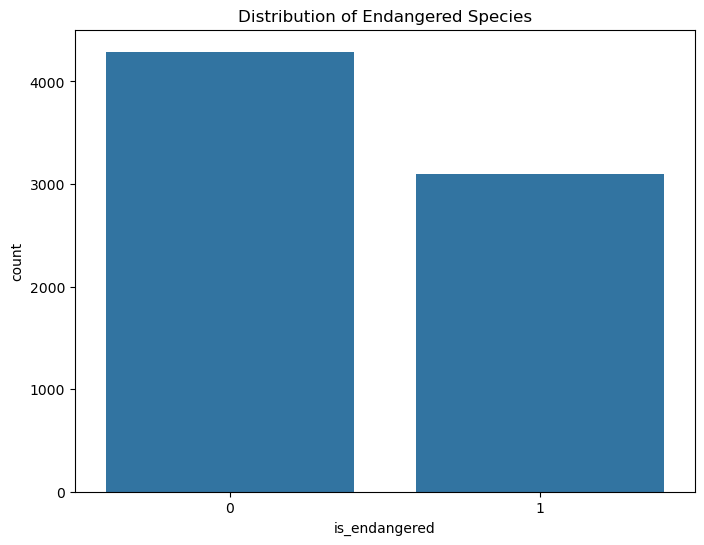

In [7]:
# prompt: perform some EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 3. Distribution of endangered species
plt.figure(figsize=(8, 6))
sns.countplot(x='is_endangered', data=df)
plt.title('Distribution of Endangered Species')
plt.show()





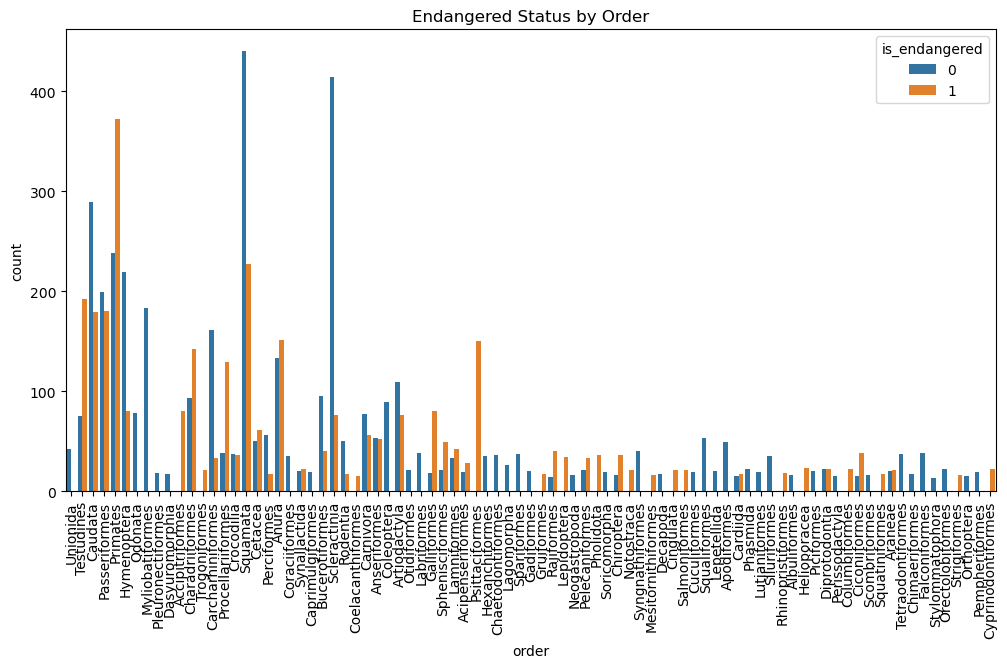

In [8]:

# 4. Explore relationship between 'order' and 'is_endangered' (example)
plt.figure(figsize=(12, 6))
sns.countplot(x='order', hue='is_endangered', data=df)
plt.xticks(rotation=90)
plt.title('Endangered Status by Order')
plt.show()


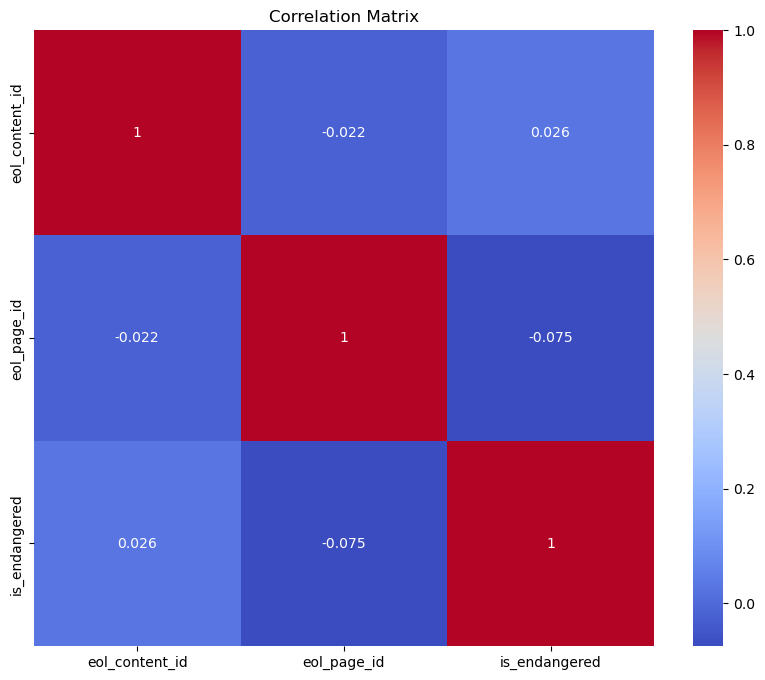

In [9]:
# 5. Correlation heatmap (if numerical columns exist)
# Check if there are any numerical columns to compute correlation.
numerical_cols = df.select_dtypes(include=np.number).columns

if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numerical columns found for correlation analysis.")

In [ ]:
df.to_csv('rare_species_data.csv', index=True)